## Install images

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
# Uploading data from github
import requests
import os
from pathlib import Path
import patoolib

destination = 'homer_marge_bart_liza_images'
source = 'https://github.com/daunyl/simpson_lookalike/raw/main/images_3.rar'

data_path = Path("data/")
image_path = data_path / destination

if image_path.is_dir():
    print(f"[INFO] {image_path} directory exists, skipping download.")
else:
    print(f"[INFO] Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    target_file = Path(source).name
    with open(data_path / target_file, "wb") as f:
        request = requests.get(source)
        print(f"[INFO] Downloading {target_file} from {source}...")
        f.write(request.content)

    patoolib.extract_archive(data_path / target_file, outdir = data_path / destination)

    print(f'[INFO] {destination} succesfuly installed to {data_path / destination}.')

[INFO] Did not find data/homer_marge_bart_liza_images directory, creating one...
[INFO] Downloading images_3.rar from https://github.com/daunyl/simpson_lookalike/raw/main/images_3.rar...
patool: Extracting data/images_3.rar ...
patool: running /usr/bin/unrar x -- /content/data/images_3.rar
patool:     with cwd='data/homer_marge_bart_liza_images'
patool: ... data/images_3.rar extracted to `data/homer_marge_bart_liza_images'.
[INFO] homer_marge_bart_liza_images succesfuly installed to data/homer_marge_bart_liza_images.


In [ ]:
# Make work with folders more comfortable
import shutil
data_dir = Path('/content/data/homer_marge_bart_liza_images/images/content/images')

for path in data_dir.glob('*/'):
  shutil.move(path, data_dir.parent.parent.parent)

shutil.rmtree('/content/data/homer_marge_bart_liza_images/images')

In [ ]:
# data_dir = Path('/content/data/homer_marge_bart_liza_images')

# for character in data_dir.glob('*/'):
#   file_extensions = set()
#   for file_name in os.listdir(character):
#     file_extensions.add(file_name.split('.')[-1])
#   print(file_extensions)
#   break

In [ ]:
# Use only jpeg, jpg and png
data_dir = Path('/content/data/homer_marge_bart_liza_images')
available_file_extensions = ['jpeg','jpg','png']

for character in data_dir.glob('*/'):
  num_of_deleted = 0
  for file_name in os.listdir(character):
    if file_name.split('.')[-1] not in available_file_extensions:
      os.remove(data_dir / character / file_name)
      num_of_deleted += 1

  print(f'[INFO] {num_of_deleted} files from {data_dir.stem}/{character} succesfuly deleted.')

[INFO] 2 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Lisa Simpson succesfuly deleted.
[INFO] 4 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Homer Simpson succesfuly deleted.
[INFO] 0 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Marge Simpson succesfuly deleted.
[INFO] 7 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Bart Simpson succesfuly deleted.


In [ ]:
import random
random.seed(42)

limit_of_images = 350

for character in data_dir.glob('*/'):
  num_of_deleted_images = 0
  limitness_paths = random.sample(os.listdir(character), k=limit_of_images)
  for file_name in os.listdir(character):
    if file_name not in limitness_paths:
      os.remove(character / file_name)
      num_of_deleted_images += 1
  print(f'[INFO] {num_of_deleted_images} files from {data_dir.stem}/{character} succesfuly deleted.')

[INFO] 4 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Lisa Simpson succesfuly deleted.
[INFO] 73 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Homer Simpson succesfuly deleted.
[INFO] 3 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Marge Simpson succesfuly deleted.
[INFO] 90 files from homer_marge_bart_liza_images//content/data/homer_marge_bart_liza_images/Bart Simpson succesfuly deleted.


In [ ]:
# Create train and test folders
# 80% train and 20% test data for each character
# Example:
# Bart Simpson - 80% go to train/Bart Simpson and 20% go to test/Bart Simpson
from sklearn.model_selection import train_test_split

data_dir = Path('/content/data/homer_marge_bart_liza_images')
test_size = 0.2
train_test_folder = data_dir.parent / 'train_test'

if not os.path.exists(train_test_folder):
  os.mkdir(train_test_folder)

folders = ['train','test']
for folder in folders:
  if not os.path.exists(train_test_folder / folder):
    os.mkdir(train_test_folder / folder)

for character in data_dir.glob('*/'):
  files = os.listdir(character)

  train_data, test_data = train_test_split(files, test_size=test_size, random_state=42)

  paths_dirs = [train_data, test_data]
  for final_dir, path_dir in zip(folders, paths_dirs):
    os.mkdir(train_test_folder / final_dir / character.stem)

    for path in path_dir:
      shutil.move(data_dir / character.stem / path, train_test_folder / final_dir / character.stem)

  shutil.rmtree(data_dir/character)

In [ ]:
train_dir = Path('/content/data/train_test/train')
test_dir = Path('/content/data/train_test/test')

train_dir, test_dir

(PosixPath('/content/data/train_test/train'),
 PosixPath('/content/data/train_test/test'))

In [ ]:
for path in test_dir.glob('*/'):
  print(f'Class: {path.stem} has {len([img for img in path.glob("*/")])} test images')

Class: Lisa Simpson has 70 test images
Class: Homer Simpson has 70 test images
Class: Marge Simpson has 70 test images
Class: Bart Simpson has 70 test images


In [ ]:
### Getting test dataset to download
# dir_to_download_test = '/content/test_download'
# os.mkdir(dir_to_download_test)
# for path in test_dir.glob('*/*'):
#   shutil.copy(path, dir_to_download_test)

## Build a model

In [ ]:
import torch

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Lisa Simpson
Random image path: /content/data/train_test/train/Lisa Simpson/Без названия (16).jpg
Image class: Lisa Simpson
Image height: 251
Image width: 201


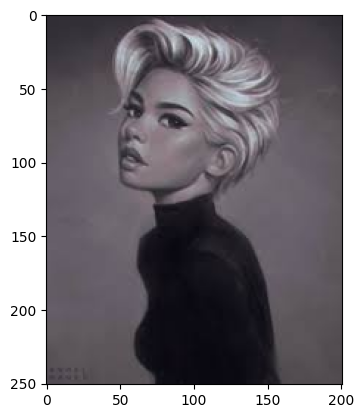

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

random.seed(42)

image_path_list = list(train_dir.glob('*/*'))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
plt.imshow(img)

In [ ]:
import random
def set_seeds(seed=42):
  random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)

In [ ]:
#random.seed(42)

image_path_list = list(test_dir.glob('*/*'))
k = 24

random_image_path = random.sample(image_path_list,k=k)

fig, axs = plt.subplots(4,6, figsize=(20,15))

for i, ax in enumerate(axs.ravel()):
  if i > k-1:
    break
  img = Image.open(random_image_path[i])
  img = img.resize((224,224))

  image_class = random_image_path[i].parent.stem

  ax.imshow(img)
  ax.set_title(image_class)

  ax.axis(False)

plt.show()

In [ ]:
import torch
from torch import nn

import torchvision

def create_resnet(num_classes,
                     seed=42):

  set_seeds(seed)

  weights = torchvision.models.ResNet34_Weights.DEFAULT

  model = torchvision.models.resnet34(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  num_features = model.fc.in_features

  model.fc = nn.Linear(num_features, num_classes)

  return model , transformer

def create_vit(num_classes,
               seed=42):

  set_seeds(seed)

  weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1

  model = torchvision.models.vit_b_16(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  model.heads = nn.Sequential(
      nn.Linear(768, num_classes, bias=True)
      )

  return model , transformer

def create_mobilenet(num_classes,
                     seed=42):

  set_seeds(seed)

  weights = torchvision.models.MobileNet_V2_Weights.DEFAULT

  model = torchvision.models.mobilenet_v2(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  model.classifier = nn.Sequential(
      nn.Dropout(p=0.2, inplace=True),
      nn.Linear(1280, num_classes, bias=True)
      )

  return model , transformer

In [ ]:
from torchvision import transforms

def train_test_transforms(IMAGE_SIZE=224):
  """
  Args: IMAGE_SIZE: int | Default: 224

  Return: Tuple(train_transformer, test_transformer)

  The function to create transforms for train and test datasets.
  """

  train_transformer = transforms.Compose([
      transforms.Resize(IMAGE_SIZE),
      transforms.CenterCrop(IMAGE_SIZE),
      transforms.RandomChoice( [
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ColorJitter(contrast=0.9),
                                transforms.ColorJitter(brightness=0.1),
                                transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(contrast=0.9) ], p=0.5),
                                transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(brightness=0.1) ], p=0.5),
                                ] ),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])

  test_transformer = transforms.Compose([
          transforms.Resize(IMAGE_SIZE),
          transforms.CenterCrop(IMAGE_SIZE),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ])

  return train_transformer, test_transformer

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets

def create_dataloaders(train_dir, test_dir, train_transformer, test_transformer, batch_size=32):
  """
  Args: train_dir: str | Train directory (path)
        test_dr: str | Test directory (path)
        train_transformer: torchvision.transforms | Train transforms
        test_transformer: torchvision.transforms | Test transforms
        batch_size: int | Batch size | Default: 32

  Return: Tuple(train_dataloader, test_dataloader, train_data, test_data, class_names)

  The function to create DataLoaders.
  """

  BATCH_SIZE = batch_size

  train_data = datasets.ImageFolder(root=train_dir,
                                    transform=train_transformer)

  test_data = datasets.ImageFolder(root=test_dir,
                                  transform=test_transformer)

  class_names = train_data.classes

  train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

  test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

  return train_dataloader, test_dataloader, train_data, test_data, class_names

In [ ]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          scheduler,
          early_stopper,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        scheduler.step()

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        if early_stopper.early_stop(test_loss):
          return results

    # Return the filled results at the end of the epochs
    return results

In [ ]:
# RANDOM_SEED = 42
# set_seeds(RANDOM_SEED)

# models_name = ['resnet','vit','mobilenet']
# model_dct = {'resnet':(create_resnet,224),
#              'vit':(create_vit,384),
#              'mobilenet':(create_mobilenet,224)
#              }

# BATCH_SIZE = 32
# results_dict = {}

# for model_name in models_name:

#   train_transformer, test_transformer = train_test_transforms(IMAGE_SIZE=model_dct[model_name][1])
#   train_dataloader, test_dataloader, train_data, test_data, class_names = create_dataloaders(train_dir=train_dir,
#                                                                       test_dir=test_dir,
#                                                                       train_transformer=train_transformer,
#                                                                       test_transformer=test_transformer,
#                                                                       batch_size=BATCH_SIZE)

#   model, transformer = model_dct[model_name][0](len(class_names))

#   LEARNING_RATE = 0.1
#   STEP_SIZE = 3

#   loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

#   optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
#   scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,
#                                               step_size=STEP_SIZE,
#                                               gamma=0.1,
#                                               last_epoch=-1,
#                                               verbose=True)

#   model_results = train(model = model,
#                   train_dataloader=train_dataloader,
#                   test_dataloader=test_dataloader,
#                   optimizer=optimizer,
#                   loss_fn=loss_fn,
#                   scheduler=scheduler,
#                   epochs=10,
#                   device=device
#                   )

#   results_dict[model_name] = model_results


In [ ]:
# len(results_dict)

In [ ]:
def plot_multiple_loss_curves(results_dict):

  fig, axs = plt.subplots(len(results_dict),2, figsize=(15,20))

  for i, (model_name, results) in enumerate(results_dict.items()):

    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(1,len(results["train_loss"])+1)


    # Plot loss
    axs[i][0].plot(epochs, loss, label="train_loss")
    axs[i][0].plot(epochs, test_loss, label="test_loss")
    axs[i][0].set_title(f"{model_name}: Loss")
    axs[i][0].set_xlabel("Epochs")
    axs[i][0].legend()

    # Plot accuracy
    axs[i][1].plot(epochs, accuracy, label="train_accuracy")
    axs[i][1].plot(epochs, test_accuracy, label="test_accuracy")
    axs[i][1].set_title(f"{model_name}: Accuracy")
    axs[i][1].set_xlabel("Epochs")
    axs[i][1].legend()

# plot_multiple_loss_curves(results_dict)

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(1,len(results["train_loss"])+1)

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
# plot_loss_curves(results_dict['resnet'])

In [ ]:
# RANDOM_SEED = 42
# set_seeds(RANDOM_SEED)

# model_dct = {'resnet':(create_resnet,224),
#              'vit':(create_vit,384),
#              'mobilenet':(create_mobilenet,224)
#              }

# BATCH_SIZE = 32

# model_name = 'mobilenet'

# train_transformer, test_transformer = train_test_transforms(IMAGE_SIZE=model_dct[model_name][1])
# train_dataloader, test_dataloader, train_data, test_data, class_names = create_dataloaders(train_dir=train_dir,
#                                                                     test_dir=test_dir,
#                                                                     train_transformer=train_transformer,
#                                                                     test_transformer=test_transformer,
#                                                                     batch_size=BATCH_SIZE)

# model, transformer = model_dct[model_name][0](len(class_names))

# LEARNING_RATE = 0.1
# STEP_SIZE = 3

# loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

# optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,
#                                             step_size=STEP_SIZE,
#                                             gamma=0.1,
#                                             last_epoch=-1,
#                                             verbose=True)

# model_results = train(model = model,
#                 train_dataloader=train_dataloader,
#                 test_dataloader=test_dataloader,
#                 optimizer=optimizer,
#                 loss_fn=loss_fn,
#                 scheduler=scheduler,
#                 epochs=10,
#                 device=device
#                 )

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import transforms
import numpy as np

# Set a random seed for reproducibility
RANDOM_SEED = 42
set_seeds(RANDOM_SEED)

# Define model options and image sizes
model_dct = {
    'resnet': (create_resnet, 224),
    'vit': (create_vit, 384),
    'mobilenet': (create_mobilenet, 224)
}

BATCH_SIZE = 32
model_name = 'mobilenet'

# Create data loaders and transformations
train_transformer, test_transformer = train_test_transforms(IMAGE_SIZE=model_dct[model_name][1])
train_dataloader, test_dataloader, train_data, test_data, class_names = create_dataloaders(train_dir=train_dir,
                                                                                          test_dir=test_dir,
                                                                                          train_transformer=train_transformer,
                                                                                          test_transformer=test_transformer,
                                                                                          batch_size=BATCH_SIZE)

# Create the model and optimizer
model, transformer = model_dct[model_name][0](len(class_names))
optimizer = Adam(params=model.parameters(), lr=0.001, weight_decay=1e-5)
early_stopper = EarlyStopper(patience=3, min_delta=0.1)

# Use learning rate scheduler
scheduler = StepLR(optimizer=optimizer,
                   step_size=3,
                   gamma=0.1,
                   last_epoch=-1,
                   verbose=True)

# Use label smoothing in the loss function
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

# Train the model
model_results = train(model=model,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      scheduler=scheduler,
                      early_stopper=early_stopper,
                      epochs=10,
                      device=device)

print(model_results)


Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/10 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 1 | train_loss: 1.2378 | train_acc: 0.4964 | test_loss: 1.0518 | test_acc: 0.7315
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 2 | train_loss: 1.0057 | train_acc: 0.7027 | test_loss: 0.9352 | test_acc: 0.7431
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 3 | train_loss: 0.9175 | train_acc: 0.7304 | test_loss: 0.8805 | test_acc: 0.7546
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 4 | train_loss: 0.8674 | train_acc: 0.7500 | test_loss: 0.8767 | test_acc: 0.7488
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 5 | train_loss: 0.8520 | train_acc: 0.7759 | test_loss: 0.8658 | test_acc: 0.7812
Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 6 | train_loss: 0.8501 | train_acc: 0.7607 | test_loss: 0.8592 | test_acc: 0.7847
Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 7 | train_loss: 0.8562 | train_acc: 0.7607 | test_loss: 0.8569 | test_acc: 0.7905
Adjusting learning rate of 

In [ ]:
# torch.save(model.state_dict(),f='BEST_MODEL.pth')

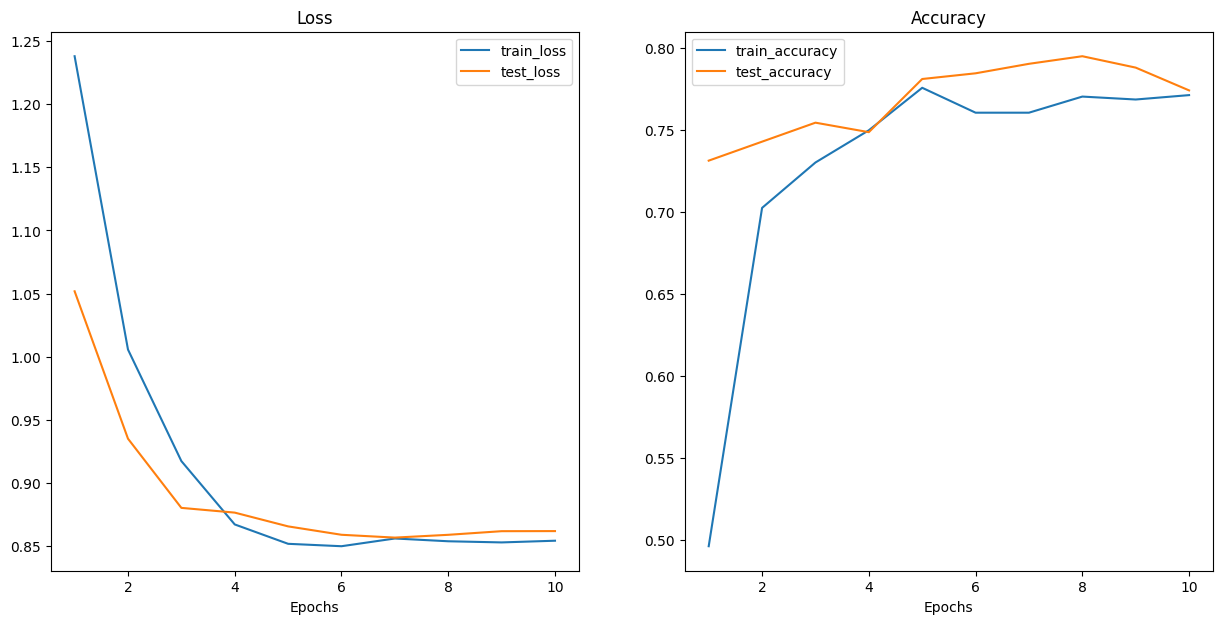

In [ ]:
plot_loss_curves(model_results)

In [ ]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

  pred_list = []

  for path in tqdm(paths):

    pred_dict = {}

    pred_dict['image_path'] = path
    class_name = path.parent.stem
    pred_dict['class_name'] = class_name

    start_time = timer()

    img = Image.open(path).convert('RGB')

    transformed_img = transform(img).unsqueeze(0).to(device)

    model = model.to(device)
    model.eval()

    with torch.inference_mode():
      pred_logit = model(transformed_img)
      pred_prob = torch.softmax(pred_logit, dim=1)
      pred_label = torch.argmax(pred_prob, dim=1)
      pred_class = class_names[pred_label.cpu()]

      pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
      pred_dict["pred_class"] = pred_class

      end_time = timer()
      pred_dict["time_for_pred"] = round(end_time-start_time, 4)

    pred_dict["correct"] = class_name == pred_class

    pred_list.append(pred_dict)

  return pred_list

In [ ]:
test_data_paths = [x for x in test_dir.glob('*/*')]
len(test_data_paths)

280

In [ ]:
model_dict = pred_and_store(paths=test_data_paths,
                            model=model,
                            transform=test_transformer,
                            class_names=class_names,
                            device="cpu")

  0%|          | 0/280 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
model_test_pred_df = pd.DataFrame(model_dict)
model_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,/content/data/train_test/test/Lisa Simpson/Wom...,Lisa Simpson,0.4492,Bart Simpson,0.0722,False
1,/content/data/train_test/test/Lisa Simpson/Wom...,Lisa Simpson,0.5204,Lisa Simpson,0.0527,True
2,/content/data/train_test/test/Lisa Simpson/Без...,Lisa Simpson,0.4231,Lisa Simpson,0.0383,True
3,/content/data/train_test/test/Lisa Simpson/Wom...,Lisa Simpson,0.4066,Bart Simpson,0.0369,False
4,/content/data/train_test/test/Lisa Simpson/Без...,Lisa Simpson,0.5734,Lisa Simpson,0.0340,True


In [ ]:
model_test_pred_df.groupby('class_name')['correct'].value_counts()

class_name     correct
Bart Simpson   True       46
               False      24
Homer Simpson  True       55
               False      15
Lisa Simpson   True       56
               False      14
Marge Simpson  True       59
               False      11
Name: correct, dtype: int64

In [ ]:
class_maps = train_data.class_to_idx
class_maps

{'Bart Simpson': 0, 'Homer Simpson': 1, 'Lisa Simpson': 2, 'Marge Simpson': 3}

In [ ]:
!pip install torchmetrics

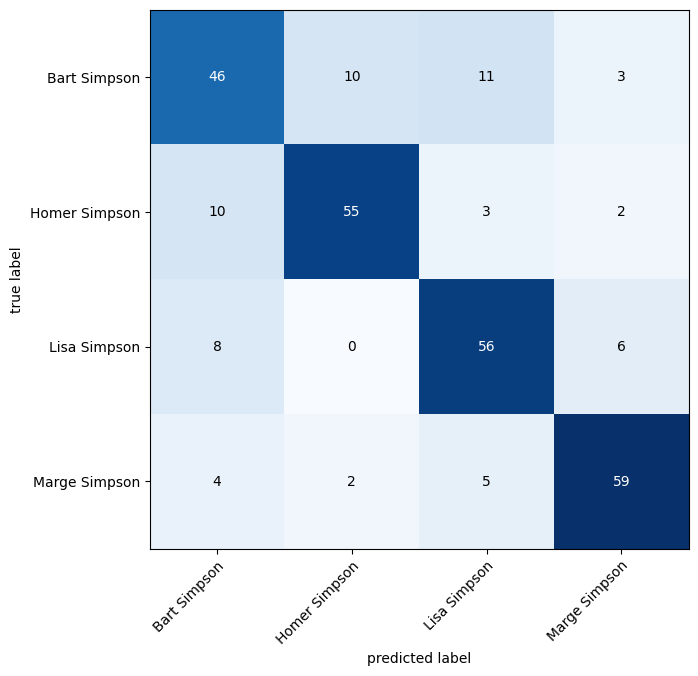

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=torch.tensor(model_test_pred_df['pred_class'].map(class_maps)).type(torch.float32),
                         target=torch.tensor(model_test_pred_df['class_name'].map(class_maps)).type(torch.float32))

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

<Axes: xlabel='class_name'>

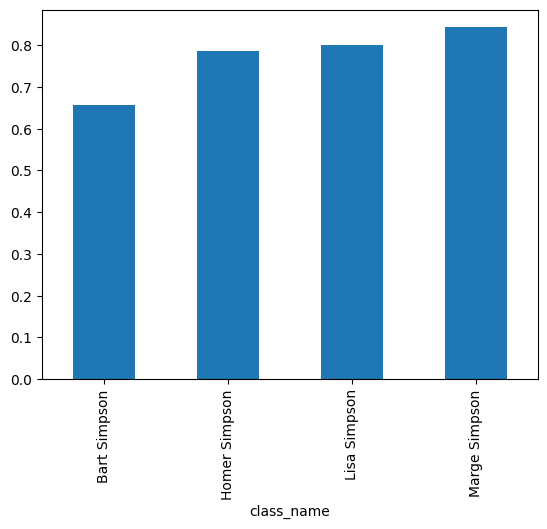

In [ ]:
model_test_pred_df.groupby('class_name')['correct'].mean().plot(kind='bar')

In [ ]:
temp_df = model_test_pred_df[(model_test_pred_df['correct']==False)].reset_index(drop=True).copy()
len(temp_df)

64

In [ ]:
fig, axs = plt.subplots(5,8, figsize=(30,20))

for i,ax in enumerate(axs.ravel()):
  if i > len(temp_df)-1:
    ax.axis(False)
    break
  img = Image.open(temp_df.loc[i,'image_path'])
  img = img.resize((124,124))

  ax.imshow(img)

  ax.set_title(f"Class name: {temp_df.loc[i,'class_name']}\nPred class: {temp_df.loc[i,'pred_class']}\nProb: {temp_df.loc[i,'pred_prob']}")
  ax.axis(False)

plt.suptitle(f'Wrong predictions on the test dataset\nNumber of wrong predictions: {len(temp_df)}\nWrong % of the whole test data: {len(temp_df) / len(test_data_paths) * 100:.1f}%',fontsize=12)
plt.show()

In [ ]:
import numpy as np

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    image_before = Image.open(image_path)

    model.to('cpu')

    target_image = target_image / 255.

    if transform:
        target_image = transform(target_image)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)

        target_image_pred = model(target_image)

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.imshow(image_before)
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
    plt.title(title)
    plt.axis(False)

    for cl, pr in sorted(zip(list(class_maps.keys()),target_image_pred_probs[0]),key=lambda x: x[1]):
      print(f'{cl} | Prob: {pr:.4f}')

    print('-'*20)

In [ ]:
import requests

custom_image_path = data_dir / "liza_simpson_1.jpeg"
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcn9Cy_OVeW0SvzH8kfjlQxmtksVoshpOC5A&usqp=CAU'
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get(url)
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download...")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Homer Simpson | Prob: 0.0218
Bart Simpson | Prob: 0.0788
Marge Simpson | Prob: 0.2392
Lisa Simpson | Prob: 0.6602
--------------------


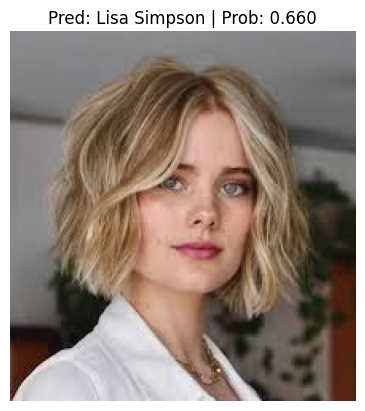

In [ ]:
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=transformer)

In [ ]:
torch.save(model.state_dict(),f='BEST_MODEL_77_acc.pth')

## Save scripts

In [ ]:
%%writefile model.py
import torch
import torchvision

from torch import nn

def create_resnet(num_classes,
                     seed=42):

  torch.manual_seed(seed)

  weights = torchvision.models.ResNet34_Weights.DEFAULT

  model = torchvision.models.resnet34(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  num_features = model.fc.in_features

  model.fc = nn.Linear(num_features, num_classes)

  return model , transformer

In [ ]:
class_names_file_path = data_path / 'class_names.txt'

with open(class_names_file_path, 'w') as f:
  print(f'[INFO] Saving class names to {class_names_file_path}')
  f.write('\n'.join(class_names))

In [ ]:
!pip install gradio

In [ ]:
# import gradio as gr
# import os
# import torch

# #from model import create_resnet
# from timeit import default_timer as timer
# from typing import Tuple, Dict

# with open("data/class_names.txt", "r") as f:
#   class_names = [food_name.strip() for food_name in f.readlines()]

# model, transformer = create_resnet(num_classes=len(class_names))

# model.load_state_dict(
#     torch.load(f="BEST_MODEL.pth",
#                map_location=torch.device("cpu"))
# )

# def predict(img) -> Tuple[Dict, float]:
#   start_time = timer()

#   img = transformer(img).unsqueeze(0)

#   model.eval()
#   with torch.inference_mode():
#     pred_probs = torch.softmax(model(img), dim=1)

#   pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

#   end_time = timer()
#   pred_time = round(end_time - start_time, 4)

#   return pred_labels_and_probs, pred_time

# title = "The Simpsons lookalike"
# description = 'A machine learning model to test how much you resemble characters from "The Simpsons"'
# article = "Created by Danylo Sushko."

# example_list = [["examples/" + example] for example in os.listdir("examples")]

# demo = gr.Interface(fn=predict,
#                     inputs=gr.Image(type="pil"),
#                     outputs=[gr.Label(num_top_classes=5, label="Predictions"),
#                              gr.Number(label="Prediction time (s)")],
#                     examples=example_list,
#                     title=title,
#                     description=description,
#                     article=article)

# demo.launch()

In [ ]:
%%writefile app.py
import gradio as gr
import os
import torch

from model import create_resnet
from timeit import default_timer as timer
from typing import Tuple, Dict

with open("data/class_names.txt", "r") as f:
  class_names = [food_name.strip() for food_name in f.readlines()]

model, transformer = create_resnet(num_classes=len(class_names))

model.load_state_dict(
    torch.load(f="BEST_MODEL",
               map_location=torch.device("cpu"))
)

def predict(img) -> Tuple[Dict, float]:
  start_time = timer()

  img = transformer(img).unsqueeze(0)

  model.eval()
  with torch.inference_mode():
    pred_probs = torch.softmax(model(img), dim=1)

  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

  end_time = timer()
  pred_time = round(end_time - start_time, 4)

  return pred_labels_and_probs, pred_time

title = "The Simpsons lookalike"
description = 'A machine learning model to test how much you resemble characters from "The Simpsons"'
article = "Created by Danylo Sushko."

example_list = [["examples/" + example] for example in os.listdir("examples")]

demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"),
                             gr.Number(label="Prediction time (s)")],
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

demo.launch()

In [ ]:
!cd /content && zip -r /content/simpsons_recognizer.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

In [ ]:
# Download
try:
  from google.colab import files
  files.download("/content/simpsons_recognizer.zip")
except:
  print(f"Not running in Google Colab, can't use google.colab.files.download(), please download file manually.")

In [ ]:
!cd /content/data/train_test/test && zip -r /content/test_dataset.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

In [ ]:
# Download
try:
  from google.colab import files
  files.download("/content/test_dataset.zip")
except:
  print(f"Not running in Google Colab, can't use google.colab.files.download(), please download file manually.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>